### In Class Assignment 1

Quantitatively, which pair of the following apartments is most similar?

|       | sq ft | bedrooms | bathrooms | toilets |
|-------|------:|---------:|----------:|---------|
| apt 0 |   850 |        2 |         1 | 1       |
| apt 1 |  1000 |        2 |         2 | 2       |
| apt 2 |  1300 |        3 |         2 | 2       |

- Define and clearly explain how you quantify whether two apartments are similar or different
- Build a dataframe and explicilty compute each pair's distance
- Be warned, this example has a quirk we haven't yet seen in class.  You can resolve it yourself with some careful thinking, do what makes sense to you!


In [1]:
!pip3 install scikit-learn

### similar or different
The two apartments are similar if the difference of apartments' size are smaller. Having a similar size may indicate that the number of bedrooms, bathrooms, etc will be almost the same. The apartments are different if there is a big size difference. 

In [2]:
# build a dataframe & compute each pair's distance
import pandas as pd
import numpy as np

df_ap = pd.DataFrame({"sq ft": [850,1000,1300], 
                       "bedrooms": [2, 2, 3], 
                       "bathrooms": [1, 2, 2],
                       "toilets": [1, 2, 2]})

df_ap

,sq ft,bedrooms,bathrooms,toilets
0,850,2,1,1
1,1000,2,2,2
2,1300,3,2,2


In [3]:
# normalize scale
for feat in df_ap.columns:
    df_ap[feat] = df_ap[feat] / df_ap[feat].std()

df_ap.var()

sq ft        1.0
bedrooms     1.0
bathrooms    1.0
toilets      1.0
dtype: float64

In [4]:
# delete to avoid depulications - double counting bathroom
del df_ap['toilets']
df_ap

,sq ft,bedrooms,bathrooms
0,3.709704,3.464102,1.732051
1,4.364358,3.464102,3.464102
2,5.673665,5.196152,3.464102


In [5]:
ap0 = df_ap.iloc[0, :]
ap1 = df_ap.iloc[1, :]
ap2 = df_ap.iloc[2, :]

In [6]:
# compute the distances
dist1 = np.linalg.norm(ap1 - ap0)
dist2 = np.linalg.norm(ap1 - ap2)
dist3 = np.linalg.norm(ap2 - ap0)

print(f'dist between ap 0/ap 1: {dist1}')
print(f'dist between ap 1/ap 2: {dist2}')
print(f'dist between ap 2/ap 0: {dist3}')

dist between ap 0/ap 1: 1.8516401995451033
dist between ap 1/ap 2: 2.171240593367237
dist between ap 2/ap 0: 3.1396087108337016


## In Class Exercise 2

Build a K-NN classifier which estimates whether a passenger on the titanic `survived` given their `age`, `pclass` and `fare` features.
- Discard any passengers which are missing a feature
- Be mindful of scale normalization, you may need to adjust data a bit
- Show the output of your classification as a confusion matrix plot, as shown above

In [7]:
import sklearn
sklearn.__version__

'1.0.2'

In [8]:
import seaborn as sns
df_titanic = sns.load_dataset("titanic")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# drop passengers that are missing a feature
df_titanic.dropna(how='any', inplace = True)

In [11]:
k = 5
x_feat_list = ["age", "pclass", "fare"]
y_feat = "survived"

In [12]:
# normalize scale
for feat in x_feat_list:
    df_titanic[feat] = df_titanic[feat] / df_titanic[feat].std()

In [13]:
# extract data into numpy format
x = df_titanic.loc[: , x_feat_list].values
y_true = df_titanic.loc[:, y_feat].values

In [14]:
# initialize a knn_classifier
knn_classifier1 = KNeighborsClassifier(n_neighbors=k)

# modify the internal state of knn_classifier
knn_classifier1.fit(x, y_true)

# estimate each feature
y_pre = knn_classifier1.predict(x)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

ti_conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pre)

# examine confusion matrix
ti_conf_mat

array([[ 25,  34],
       [  8, 115]])

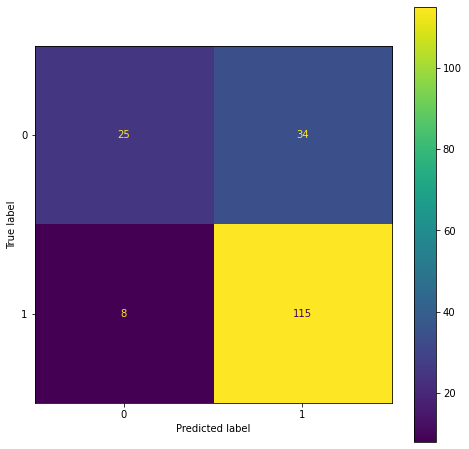

In [16]:
ti_conf_mat_disp = ConfusionMatrixDisplay(ti_conf_mat, display_labels=np.unique(y_true))
ti_conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default
plt.grid(False)